In [71]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision import datasets
import matplotlib.pyplot as plt
import os
import csv
from sklearn.model_selection import train_test_split

In [72]:
PATH_D = "Series temporales/DNI/"
NUM_S = 3
SENSORS = ["S1", "S3", "S4"]

In [73]:
def get_series():
    """Devuelve la lista total de días válidos e inválidos para cada
       sensor.

    Returns:
        list: una matriz, donde:
            dim. 0: número de sensor
            dim. 1: válidos/inválidos
    """
    series = []
    for i in range(NUM_S):
        validos = sorted(os.listdir(PATH_D + SENSORS[i] + "/series/validas"))
        invalidos = sorted(os.listdir(PATH_D + SENSORS[i] + "/series/no validas"))
        series.append([validos,invalidos])
    return series

In [74]:
# series inválidas para sensor S1 (posición 0)
print(get_series()[0][1])

['2013-225', '2013-42', '2014-269', '2014-270', '2014-271', '2014-272', '2014-273', '2014-274', '2014-275', '2014-276', '2014-277', '2014-278', '2014-279', '2014-280', '2014-281', '2014-282', '2014-283', '2014-284', '2014-285', '2014-286', '2014-287', '2014-288', '2014-289', '2014-290', '2014-291', '2014-292', '2014-293', '2014-294', '2014-295', '2014-296', '2014-297', '2014-298', '2014-299', '2014-300', '2014-301', '2014-302', '2014-303', '2014-304', '2014-305', '2014-306', '2014-307', '2014-308', '2014-309', '2014-310', '2014-311', '2014-312', '2014-313', '2014-314', '2014-315', '2014-316', '2014-317', '2014-318', '2014-319', '2014-320', '2014-321', '2014-322', '2014-323', '2014-324', '2014-325', '2014-326', '2014-327', '2014-328', '2014-329', '2014-330', '2014-357', '2014-65', '2014-8', '2015-118', '2015-119', '2015-120', '2015-20', '2015-293', '2015-302', '2015-303', '2016-110', '2016-111', '2016-202', '2016-203', '2016-204', '2016-205', '2016-206', '2016-207', '2016-208', '2016-3'

In [75]:
def search_day(year,day,series):
    """Indica qué sensores presentan una serie válida para el día indicado.

    Args:
        year (int): el año del día
        day (int): el número de día
        series (list): matriz del tipo
            que devuelve get_series()

    Returns:
        param (list): lista de 3 elementos. Cada elemento indica si la serie es
            válida para el sensor de esa posición. 0: válido, 1: inválido
            ejemplo: [1,0,0] Inválido para S1, válido para S3 y S4.

    """
    name = str(year) + '-' + str(day)
    param = []
    for i in range(NUM_S):
        for j in range(2):
            if name in series[i][j]:
                param.append(float(j))
    return param

In [76]:
series = get_series()

In [77]:
# Ejemplo de search_day
print(search_day(2015,68,series))

[0.0, 0.0, 0.0]


In [78]:
# Aquí se revisa si falta algún día que no aparezca en el set de datos.
# los días que falten se muestran por pantalla.
# (Se muestran días de 2019 porque de este año solo se tiene medio año
# en el set de datos)
for y in range(2013,2020):
    for d in range(1,366):
        if (len(search_day(y,d,series)) != 3):
            print(str(y)+"-"+str(d))

2019-182
2019-183
2019-184
2019-185
2019-186
2019-187
2019-188
2019-189
2019-190
2019-191
2019-192
2019-193
2019-194
2019-195
2019-196
2019-197
2019-198
2019-199
2019-200
2019-201
2019-202
2019-203
2019-204
2019-205
2019-206
2019-207
2019-208
2019-209
2019-210
2019-211
2019-212
2019-213
2019-214
2019-215
2019-216
2019-217
2019-218
2019-219
2019-220
2019-221
2019-222
2019-223
2019-224
2019-225
2019-226
2019-227
2019-228
2019-229
2019-230
2019-231
2019-232
2019-233
2019-234
2019-235
2019-236
2019-237
2019-238
2019-239
2019-240
2019-241
2019-242
2019-243
2019-244
2019-245
2019-246
2019-247
2019-248
2019-249
2019-250
2019-251
2019-252
2019-253
2019-254
2019-255
2019-256
2019-257
2019-258
2019-259
2019-260
2019-261
2019-262
2019-263
2019-264
2019-265
2019-266
2019-267
2019-268
2019-269
2019-270
2019-271
2019-272
2019-273
2019-274
2019-275
2019-276
2019-277
2019-278
2019-279
2019-280
2019-281
2019-282
2019-283
2019-284
2019-285
2019-286
2019-287
2019-288
2019-289
2019-290
2019-291
2019-292
2

In [79]:
def reshape_series(series):
    """ Devuelve el dataset en un formato diferente.

    Args:
        series (list): dataset en formato devuelto por get_series()

    Returns:
        series_reshaped (list): Lista total de días donde cada elemento es 
            un día seguido por la lista devuelta por search_day() para ese
            día.
    """
    series_reshaped = []
    for y in range(2013,2020):
        for d in range(1,366):
            labels = search_day(y,d,series)
            if len(labels) == NUM_S:
                series_reshaped.append([str(y)+'-'+str(d),labels])

    return series_reshaped

In [80]:
# visualización del dataset devuelto por reshape_series
series = reshape_series(series)
print(series)

[['2013-1', [0.0, 0.0, 0.0]], ['2013-2', [0.0, 0.0, 0.0]], ['2013-3', [0.0, 0.0, 0.0]], ['2013-4', [0.0, 0.0, 0.0]], ['2013-5', [0.0, 0.0, 0.0]], ['2013-6', [0.0, 0.0, 0.0]], ['2013-7', [0.0, 0.0, 0.0]], ['2013-8', [0.0, 0.0, 0.0]], ['2013-9', [0.0, 0.0, 0.0]], ['2013-10', [0.0, 0.0, 0.0]], ['2013-11', [0.0, 0.0, 0.0]], ['2013-12', [0.0, 0.0, 0.0]], ['2013-13', [0.0, 0.0, 0.0]], ['2013-14', [0.0, 0.0, 0.0]], ['2013-15', [0.0, 0.0, 0.0]], ['2013-16', [0.0, 0.0, 0.0]], ['2013-17', [0.0, 0.0, 1.0]], ['2013-18', [0.0, 0.0, 0.0]], ['2013-19', [0.0, 0.0, 1.0]], ['2013-20', [0.0, 0.0, 1.0]], ['2013-21', [0.0, 0.0, 1.0]], ['2013-22', [0.0, 0.0, 0.0]], ['2013-23', [0.0, 0.0, 0.0]], ['2013-24', [0.0, 0.0, 0.0]], ['2013-25', [0.0, 0.0, 0.0]], ['2013-26', [0.0, 0.0, 0.0]], ['2013-27', [0.0, 0.0, 0.0]], ['2013-28', [0.0, 0.0, 0.0]], ['2013-29', [0.0, 0.0, 0.0]], ['2013-30', [0.0, 0.0, 0.0]], ['2013-31', [0.0, 1.0, 0.0]], ['2013-32', [0.0, 1.0, 0.0]], ['2013-33', [0.0, 0.0, 0.0]], ['2013-34', [0.0, 

In [81]:
# Dataset utilizado para el modelo CNN_mem.
# Para cada día se tiene, además, la indicación vállidos/inválidos
# para el día anterior.

memory_series = series.copy()
for i in range(len(memory_series)):
    if i == 0:
        memory_series[i].append([0.0,0.0,0.0])
    else:
        memory_series[i].append(series[i-1][1])

In [82]:
print(memory_series[:20])

[['2013-1', [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], ['2013-2', [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], ['2013-3', [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], ['2013-4', [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], ['2013-5', [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], ['2013-6', [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], ['2013-7', [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], ['2013-8', [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], ['2013-9', [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], ['2013-10', [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], ['2013-11', [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], ['2013-12', [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], ['2013-13', [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], ['2013-14', [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], ['2013-15', [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], ['2013-16', [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], ['2013-17', [0.0, 0.0, 1.0], [0.0, 0.0, 0.0]], ['2013-18', [0.0, 0.0, 0.0], [0.0, 0.0, 1.0]], ['2013-19', [0.0, 0.0, 1.0], [0.0, 0.0, 0.0]], ['2013-20', [0.0, 0.0, 1.0], [0.0, 0.0, 1.0]]]


In [83]:
def get_points(path):
    """ Devuelve la lista de puntos para el archivo de una serie temporal.

    Args:
        path (str): Ruta del archivo de la serie temporal

    Returns:
        y (list): Lista de puntos de la serie temporal
        
    """
    with open(path, newline='',encoding="utf-8") as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            if not '' in row:
                y = [float(x) for x in row]
            else:
                y = []
                for x in row:
                    y.append(float('2000')) if x == '' else y.append(float(x))
    return y

In [84]:
class dni(Dataset):
    """Dataset de pytorch de las series temporales de radiación directa

    Attributes:
        root_dir (str): La ruta base donde se encuentran las series temporales
        files (list): lista de los nombres de los archivos de las series
            temporales. Debe estar en el mismo formato que el devuelto por
            reshape_series()
    """
    def __init__(self, root_dir, files):
        self.root_dir = root_dir
        self.files = files              

    def __len__(self):
        return len(self.files)
    
    def __getitem__(self, index):
        series = []
        item = self.files[index]
        for i in range(NUM_S):
            path = self.root_dir + SENSORS[i] + "/series" 
            path += ("/validas" if item[1][i] == 0 else "/no validas")
            path += "/" + item[0]
            series.append(get_points(path))

        return (torch.tensor([series]), torch.tensor(item[1]))


In [85]:
class dni_mem(Dataset):
    """Dataset de pytorch de las series temporales de radiación directa para
    el modelo CNN_mem

    Importante: este dataset es experimental. No se puede usar puesto que utiliza
    información de clasificación aportada por un humano.

    Attributes:
        root_dir (str): La ruta base donde se encuentran las series temporales
        files (list): lista de los nombres de los archivos de las series
            temporales. Debe estar en el mismo formato que el devuelto por
            reshape_series() y además tener cada día la información de validez del
            día anterior.
    """
    
    def __init__(self, root_dir, files):
        self.root_dir = root_dir
        self.files = files

    def __len__(self):
        return len(self.files)
    
    def __getitem__(self, index):
        series = []
        item = self.files[index]
        for i in range(NUM_S):
            path = self.root_dir + SENSORS[i] + "/series" 
            path += ("/validas" if item[1][i] == 0 else "/no validas")
            path += "/" + item[0]
            series.append(get_points(path))
        return ([torch.tensor(series),torch.tensor(item[2])], torch.tensor(item[1]))

In [86]:
# class dni_dif(Dataset):
#     def __init__(self, root_dir, files, n_sensor):
#         self.root_dir = root_dir
#         self.files = files     
#         self.n_sensor = n_sensor         

#     def __len__(self):
#         return len(self.files)
    
#     def __getitem__(self, index):
#         series = np.zeros(shape=(3,144),dtype=float)
#         item = self.files[index]
#         for i in range(NUM_S):
#             path = self.root_dir + SENSORS[i] + "/series" 
#             path += ("/validas" if item[1][i] == 0 else "/no validas")
#             path += "/" + item[0]
#             series[i] = get_points(path)

#         series[(self.n_sensor-1)%3] = series[(self.n_sensor-1)%3] - series[self.n_sensor]
#         series[(self.n_sensor+1)%3] = series[(self.n_sensor+1)%3] - series[self.n_sensor]

#         return (torch.tensor([series],dtype=torch.float32), torch.tensor(item[1][0],dtype=torch.float32))

In [87]:
# División de las series temporales en train y test
# Se aplica la proporción por defecto: 75% train, 25% test
train_series, test_series = train_test_split(series)
train_series_mem, test_series_mem = train_test_split(memory_series)

In [88]:
print("Número de instancias en el conjunto de entrenamiento:",len(train_series))
print("Número de instancias en el conjunto de test:",len(test_series))

Número de instancias en el conjunto de entrenamiento: 1778
Número de instancias en el conjunto de test: 593


In [89]:
print(len(series))

2371


In [90]:
# tamaño del batch para entrenar el modelo. De momento no funciona bien
# si se emplea un tamaño diferente a 1.
batch_size = 1

In [91]:
class CNN(nn.Module):
    """Modelo de pytorch de aprendizaje profundo.

    Se trata de una red neuronal convolucional, que recibe como input
    las tres series temporales de cada sensor en forma de matriz
    3x144. Cada fila es una serie temporal de un sensor. Las columnas
    son cada una de las mediciones, siendo en total 144.

    Se aplica un padding circular, copiando la última fila encima de la 
    primera y la primera debajo de la última, lo que le confiere al 
    input una topología cilíndrica. De esta manera, los tres sensores
    son tratados por igual.
    """
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(1,3,3)
        self.conv2 = nn.Conv2d(3,9,3)
        self.pool = nn.MaxPool2d((1,2))
        self.dense1 = nn.Linear(9*3*34,50)        
        self.dense2 = nn.Linear(50,3)             
        self.flatten = nn.Flatten()               
                                                  
        #144-2=142
        #142/2=71
        #71-2=69
        #69/2=34
        #9*3*34= 918
        
    def forward(self, x):
        """Recorrido de un input por la red neuronal
        
        La secuencia es la siguiente:
        convolución -> pool -> convolución -> pool ->
        flatten -> capa densa -> capa densa

        La función de activación empleada es la sigmoide.
        
        Args:
            x: matriz del input

        Returns:
            x: lista de tres elementos que indican la validez
                de las series temporales para cada sensor.
        """
        x = F.pad(x, (0, 0, 1, 1), mode='circular')
        x = self.pool(F.sigmoid(self.conv1(x)))
        x = F.pad(x, (0, 0, 1, 1), mode='circular')
        x = self.pool(F.sigmoid(self.conv2(x)))
        #x = x.view((batch_size,9*3*34))
        x = self.flatten(x)
        x = F.sigmoid(self.dense1(x))
        x = self.dense2(x)
        return x

In [92]:
class CNN_mem(nn.Module):
    """Modelo de pytorch de aprendizaje profundo.

    Se trata de una red neuronal convolucional, similar a CNN. En este caso
    se utiliza también la información de la clasificación de la serie temporal en 
    válido/inválido del día anterior.

    """
    def __init__(self):
        super(CNN_mem,self).__init__()
        self.conv1 = nn.Conv2d(1,3,3)
        self.conv2 = nn.Conv2d(3,9,3)
        self.pool = nn.AvgPool2d((1,2))
        self.dense1 = nn.Linear(9*3*34+3,50)        #144-2=142
        self.dense2 = nn.Linear(50,3)             #142/2=71
        self.flatten = nn.Flatten()               #71-2=69
                                                  #69/2=34
                                                  #9*3*34= 918
    def forward(self, x_mem):
        """Recorrido de un input por la red neuronal
        
        La secuencia es la siguiente:
        convolución -> pool -> convolución -> pool ->
        flatten -> concatenación con output del día anterior ->
        capa densa -> capa densa

        La función de activación empleada es la sigmoide.
        
        Args:
            x: matriz del input junto a la información de clasificación
                del día anterior.

        Returns:
            x: lista de tres elementos que indican la validez
                de las series temporales para cada sensor.
        """
        x = x_mem[0]
        mem = x_mem[1]
        x = F.pad(x, (0, 0, 1, 1), mode='circular')
        x = self.pool(F.sigmoid(self.conv1(x)))
        x = F.pad(x, (0, 0, 1, 1), mode='circular')
        x = self.pool(F.sigmoid(self.conv2(x)))

        x = x.view(batch_size,9*3*34)
        #x = self.flatten(x)
        # print(x.shape)
        # x = torch.squeeze(x)
        # print(x.shape)
        # print(mem.shape)
        x = F.sigmoid(self.dense1(torch.cat((x,mem),dim=1)))
        x = self.dense2(x)
        return x

In [93]:
# class CNN2(nn.Module):
#     def __init__(self):
#         super(CNN2,self).__init__()
#         self.avgpool = nn.AvgPool2d((1,4))
#         self.conv = nn.Conv2d(1,3,3)
#         self.dense1 = nn.Linear(108 + 102, 10)
#         self.dense2 = nn.Linear(10, 1)
#         self.flatten = nn.Flatten()

#     def forward(self, x):
#         x1 = self.avgpool(x)
#         x2 = F.relu(self.conv(x1))
#         x1 = torch.squeeze(self.flatten(x1))
#         x2 = torch.squeeze(self.flatten(x2))
#         x = torch.cat((x1,x2))
#         x = F.sigmoid(self.dense1(x))
#         x = self.dense2(x)

#         return x

In [94]:
def get_weights(train_series,coef=1):
    """Calcula los pesos necesarios para la función de pérdida
    de binary cross entropy

    Estos pesos son iguales al número de ejemplos negativos
    por cada positivo. Entendiendo como negativo: válido y
    positivo: inválido.

    Args:
        train_series: El dataset de entrenamiento, en formato
            igual al devuelto por reshape_series()
        coef: Coeficiente por el que se multiplican los pesos.
            Este parámetro es útil para modificar el balance
            precission-recall logrado por el modelo. Si coef>1,
            aumenta el recall. Si coef<1, aumenta la precission.

    Returns:
        lista de pesos, tiene tres elemenentos. Cada peso se
            calcula para cada sensor.
    """
    labels = np.zeros((len(train_series),NUM_S),dtype=float)
    for i in range(labels.shape[0]):
        labels[i] = train_series[i][1]

    labels = torch.tensor(labels)
    # Cuenta positivos y negativos por clase
    num_pos = labels.sum(dim=0)
    num_neg = labels.shape[0] - num_pos

    # Calcula el pos_weight
    pos_weight = num_neg / num_pos
    pos_weight = pos_weight
    return coef*pos_weight

In [95]:
labels = np.zeros((len(train_series),3),dtype=float)
for i in range(labels.shape[0]):
    labels[i] = train_series[i][1]

labels = torch.tensor(labels)
print(labels)

tensor([[1., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)


In [96]:
# Cuenta positivos y negativos por clase
num_pos = labels.sum(dim=0)
num_neg = labels.shape[0] - num_pos

# Calcula el pos_weight
pos_weight = num_neg / num_pos
pos_weight = pos_weight
print(pos_weight)

tensor([5.0271, 5.7863, 8.1649], dtype=torch.float64)


In [97]:
# Los pesos pueden variar entre un dataset y otro porque cada
# vez que se ejecuta la función train_test_split, se generan
# los conjuntos de datos de manera aleatoria.

pos_weight = get_weights(train_series)
print("Pesos ds sin memoria:",pos_weight)
pos_weight_mem = get_weights(train_series_mem)
print("Pesos ds con memoria:",pos_weight_mem)

Pesos ds sin memoria: tensor([5.0271, 5.7863, 8.1649], dtype=torch.float64)
Pesos ds con memoria: tensor([5.0068, 5.5609, 8.2124], dtype=torch.float64)


In [98]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # if (batch +1) % 100 == 0:
        #     loss, current = loss.item(), batch * batch_size + len(X)
        #     print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    positive_real, positive_pred, test_loss, correct, correct_pos = 0, 0, 0, 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = F.sigmoid(model(X))
            test_loss += loss_fn(pred, y).item()
            #print("PRED:",pred.round(),y)

            pred_pos = (pred.round() == 1.0)
            real_pos = (y == 1.0)
            positive_pred += pred_pos.type(torch.float).sum().item()
            positive_real += real_pos.type(torch.float).sum().item()
            correct_pos += torch.bitwise_and(pred_pos,real_pos).type(torch.float).sum().item()
            correct += (pred.round() == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= 3*size
    print(f"Test Error: \nAccuracy: \t {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}")
    print(f"Precission: \t {(100*correct_pos/positive_pred):>0.1f}%")
    print(f"Recall: \t {(100*correct_pos/positive_real):>0.1f}%")

    return test_loss, correct, correct_pos/positive_pred, correct_pos/positive_real


In [99]:
train_ds = dni(PATH_D,train_series)
test_ds = dni(PATH_D,test_series)

In [100]:
batch_size = 1
train_load = DataLoader(train_ds,batch_size=batch_size,shuffle=True,drop_last=True)
test_load = DataLoader(test_ds,batch_size=batch_size,shuffle=True,drop_last=True)

In [101]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [102]:
model = CNN().to(device)

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model.parameters(),lr=0.0005)

epochs = 20

loss = np.zeros(shape=(2,epochs),dtype=float)
accuracy = np.zeros(shape=(2,epochs),dtype=float)
precission = np.zeros(shape=(2,epochs),dtype=float)
recall = np.zeros(shape=(2,epochs),dtype=float)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_load, model, criterion, optimizer)
    print("Training dataset:")
    a,b,c,d = test_loop(train_load,model,criterion)
    loss[0,t], accuracy[0,t], precission[0,t], recall[0,t] = (a,b,c,d)
    print("")
    print("Test dataset:")
    loss[1,t], accuracy[1,t], precission[1,t], recall[1,t] = test_loop(test_load, model, criterion)
    print("")
print("Done!")


Epoch 1
-------------------------------
Training dataset:
Test Error: 
Accuracy: 	 90.5%, Avg loss: 1.104265
Precission: 	 64.3%
Recall: 	 73.8%

Test dataset:
Test Error: 
Accuracy: 	 90.9%, Avg loss: 1.119107
Precission: 	 67.2%
Recall: 	 77.1%

Epoch 2
-------------------------------
Training dataset:
Test Error: 
Accuracy: 	 93.3%, Avg loss: 1.045915
Precission: 	 77.9%
Recall: 	 73.1%

Test dataset:
Test Error: 
Accuracy: 	 93.4%, Avg loss: 1.055352
Precission: 	 78.2%
Recall: 	 77.1%

Epoch 3
-------------------------------
Training dataset:
Test Error: 
Accuracy: 	 92.4%, Avg loss: 1.042512
Precission: 	 73.1%
Recall: 	 72.7%

Test dataset:
Test Error: 
Accuracy: 	 92.1%, Avg loss: 1.051097
Precission: 	 72.2%
Recall: 	 77.1%

Epoch 4
-------------------------------
Training dataset:
Test Error: 
Accuracy: 	 95.0%, Avg loss: 1.023338
Precission: 	 92.2%
Recall: 	 70.7%

Test dataset:
Test Error: 
Accuracy: 	 94.9%, Avg loss: 1.033216
Precission: 	 92.3%
Recall: 	 72.2%

Epoch 5


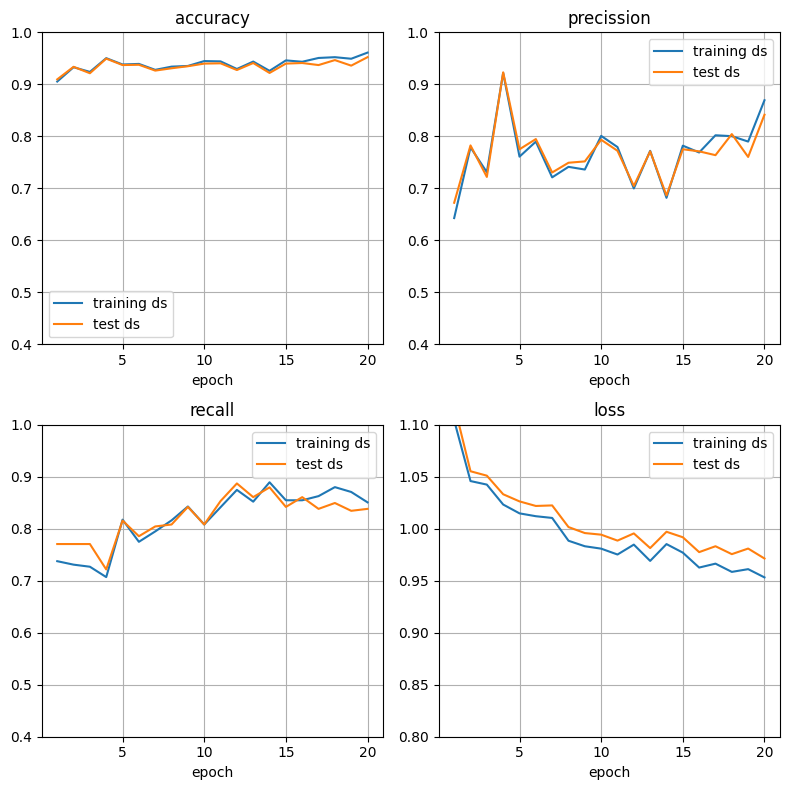

In [103]:
x = range(1,1+epochs)
fig, ax = plt.subplots(2,2,figsize=(8,8))
ax[0,0].plot(x,accuracy[0,:], label="training ds")
ax[0,0].plot(x,accuracy[1,:], label="test ds")
ax[0,0].set_ylim(0.4,1)
ax[0,0].set_xlabel("epoch")
ax[0,0].grid()
ax[0,0].set_title("accuracy")
ax[0,0].legend()

ax[0,1].plot(x,precission[0,:], label="training ds")
ax[0,1].plot(x,precission[1,:], label="test ds")
ax[0,1].set_ylim(0.4,1)
ax[0,1].set_xlabel("epoch")
ax[0,1].grid()
ax[0,1].set_title("precission")
ax[0,1].legend()

ax[1,0].plot(x,recall[0,:], label="training ds")
ax[1,0].plot(x,recall[1,:], label="test ds")
ax[1,0].set_ylim(0.4,1)
ax[1,0].set_xlabel("epoch")
ax[1,0].grid()
ax[1,0].set_title("recall")
ax[1,0].legend()

ax[1,1].plot(x,loss[0,:], label="training ds")
ax[1,1].plot(x,loss[1,:], label="test ds")
ax[1,1].set_ylim(0.8,1.1)
ax[1,1].set_xlabel("epoch")
ax[1,1].grid()
ax[1,1].set_title("loss")
ax[1,1].legend()

fig.tight_layout()

plt.show()


In [104]:
train_ds = dni_mem(PATH_D,train_series)
test_ds = dni_mem(PATH_D,test_series)

In [105]:
batch_size = 1
train_load = DataLoader(train_ds,batch_size=batch_size,shuffle=True,drop_last=True)
test_load = DataLoader(test_ds,batch_size=batch_size,shuffle=True,drop_last=True)

In [106]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [107]:
model = CNN_mem().to(device)

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight_mem)
optimizer = torch.optim.Adam(model.parameters(),lr=0.0005)

epochs = 20

loss = np.zeros(shape=(2,epochs),dtype=float)
accuracy = np.zeros(shape=(2,epochs),dtype=float)
precission = np.zeros(shape=(2,epochs),dtype=float)
recall = np.zeros(shape=(2,epochs),dtype=float)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_load, model, criterion, optimizer)
    print("Training dataset:")
    a,b,c,d = test_loop(train_load,model,criterion)
    loss[0,t], accuracy[0,t], precission[0,t], recall[0,t] = (a,b,c,d)
    print("")
    print("Test dataset:")
    loss[1,t], accuracy[1,t], precission[1,t], recall[1,t] = test_loop(test_load, model, criterion)
    print("")
print("Done!")


Epoch 1
-------------------------------
Training dataset:
Test Error: 
Accuracy: 	 92.1%, Avg loss: 1.089667
Precission: 	 68.8%
Recall: 	 80.3%

Test dataset:
Test Error: 
Accuracy: 	 92.6%, Avg loss: 1.100766
Precission: 	 72.1%
Recall: 	 82.7%

Epoch 2
-------------------------------
Training dataset:
Test Error: 
Accuracy: 	 92.8%, Avg loss: 1.044025
Precission: 	 71.8%
Recall: 	 80.2%

Test dataset:
Test Error: 
Accuracy: 	 92.7%, Avg loss: 1.053995
Precission: 	 72.6%
Recall: 	 82.7%

Epoch 3
-------------------------------
Training dataset:
Test Error: 
Accuracy: 	 95.3%, Avg loss: 1.005139
Precission: 	 86.4%
Recall: 	 79.0%

Test dataset:
Test Error: 
Accuracy: 	 96.0%, Avg loss: 1.014344
Precission: 	 89.2%
Recall: 	 83.5%

Epoch 4
-------------------------------
Training dataset:
Test Error: 
Accuracy: 	 95.3%, Avg loss: 1.000928
Precission: 	 80.9%
Recall: 	 87.0%

Test dataset:
Test Error: 
Accuracy: 	 94.5%, Avg loss: 1.010271
Precission: 	 79.0%
Recall: 	 86.5%

Epoch 5


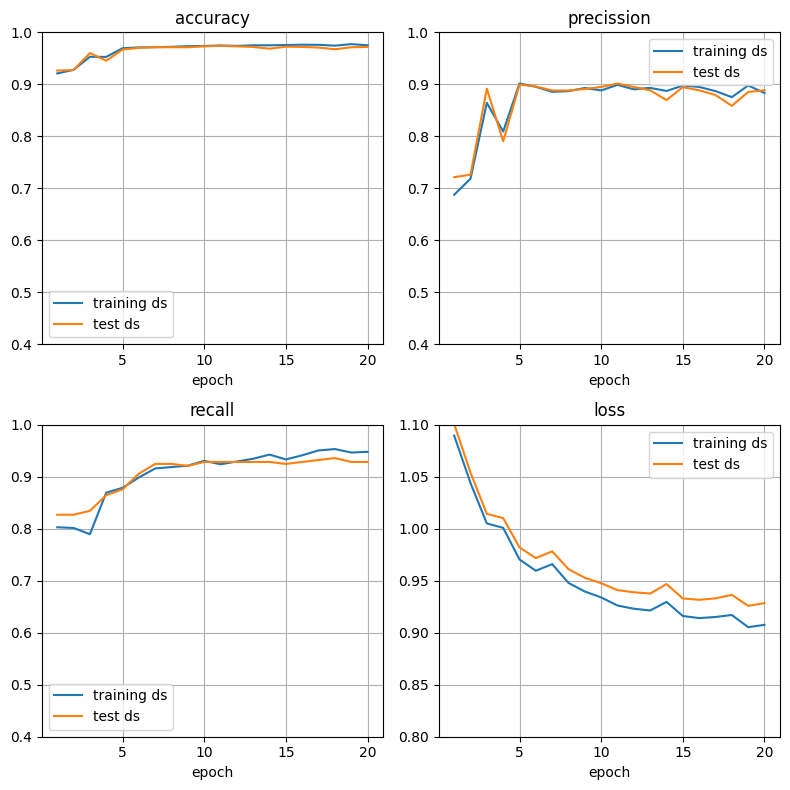

In [108]:
x = range(1,1+epochs)
fig, ax = plt.subplots(2,2,figsize=(8,8))
ax[0,0].plot(x,accuracy[0,:], label="training ds")
ax[0,0].plot(x,accuracy[1,:], label="test ds")
ax[0,0].set_ylim(0.4,1)
ax[0,0].set_xlabel("epoch")
ax[0,0].grid()
ax[0,0].set_title("accuracy")
ax[0,0].legend()

ax[0,1].plot(x,precission[0,:], label="training ds")
ax[0,1].plot(x,precission[1,:], label="test ds")
ax[0,1].set_ylim(0.4,1)
ax[0,1].set_xlabel("epoch")
ax[0,1].grid()
ax[0,1].set_title("precission")
ax[0,1].legend()

ax[1,0].plot(x,recall[0,:], label="training ds")
ax[1,0].plot(x,recall[1,:], label="test ds")
ax[1,0].set_ylim(0.4,1)
ax[1,0].set_xlabel("epoch")
ax[1,0].grid()
ax[1,0].set_title("recall")
ax[1,0].legend()

ax[1,1].plot(x,loss[0,:], label="training ds")
ax[1,1].plot(x,loss[1,:], label="test ds")
ax[1,1].set_ylim(0.8,1.1)
ax[1,1].set_xlabel("epoch")
ax[1,1].grid()
ax[1,1].set_title("loss")
ax[1,1].legend()

fig.tight_layout()

plt.show()


